In [12]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

In [13]:
def list_images_and_labels(dataset_root):
    images = []
    labels = []
    classes = sorted([d for d in os.listdir(dataset_root) if os.path.isdir(os.path.join(dataset_root, d))])
    for cls in classes:
        cls_dir = os.path.join(dataset_root, cls)
        for fname in os.listdir(cls_dir):
            if fname.lower().endswith(".tif"):
                images.append(os.path.join(cls_dir, fname))
                labels.append(cls)
    return images, labels, classes

In [14]:
images, labels, class_names = list_images_and_labels("./Images")
if not images:
    raise RuntimeError("No images found. Check DATASET_DIR path and structure.")
X_train_paths, X_test_paths, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, stratify=labels, random_state=42)

print(f"Found {len(class_names)} classes, {len(images)} images total.")
print(f"Train: {len(X_train_paths)} images, Test: {len(X_test_paths)} images")


Found 21 classes, 2100 images total.
Train: 1680 images, Test: 420 images


In [15]:
def read_and_preprocess(path, size=(256, 256)):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Unable to read image: {path}")
    img = cv2.resize(img, size, interpolation=cv2.INTER_AREA)
    return img

In [16]:
print("\n2) Extracting SIFT descriptors from training images...")
sift = cv2.SIFT_create()
train_descriptors_list = []  
descriptor_stack = []        
image_descriptor_counts = [] 
SIFT_POOL_LIMIT = None 
for path in tqdm(X_train_paths, desc="SIFT (train)"):
    img = read_and_preprocess(path)
    kp, des = sift.detectAndCompute(img, None)
    if des is None:
        
        des = np.zeros((1, 128), dtype=np.float32)
    train_descriptors_list.append(des)
    image_descriptor_counts.append(des.shape[0])
    descriptor_stack.append(des)

descriptor_stack = np.vstack(descriptor_stack).astype(np.float32)
print(f"Total descriptors from train set: {descriptor_stack.shape[0]}")

if SIFT_POOL_LIMIT is not None and descriptor_stack.shape[0] > SIFT_POOL_LIMIT:
    np.random.seed(42)
    idx = np.random.choice(descriptor_stack.shape[0], SIFT_POOL_LIMIT, replace=False)
    desc_for_kmeans = descriptor_stack[idx]
else:
    desc_for_kmeans = descriptor_stack


2) Extracting SIFT descriptors from training images...


SIFT (train): 100%|██████████| 1680/1680 [01:24<00:00, 19.85it/s]


Total descriptors from train set: 1172275


In [17]:
print(f"\n3) Clustering descriptors to build visual vocabulary (K={200}) ...")
kmeans200 = MiniBatchKMeans(n_clusters=200, batch_size=1000, random_state=42, verbose=1)
kmeans200.fit(desc_for_kmeans)
vocabulary200 = kmeans200.cluster_centers_
print("KMeans trained. Vocabulary shape:", vocabulary200.shape)

# save vocabulary
joblib.dump(kmeans200, os.path.join("models", "kmeans200_bovw.pkl"))
print("Saved KMeans model to:", os.path.join("models", "kmeans200_bovw.pkl"))




print(f"\n3) Clustering descriptors to build visual vocabulary (K={150}) ...")
kmeans150 = MiniBatchKMeans(n_clusters=150, batch_size=1000, random_state=42, verbose=1)
kmeans150.fit(desc_for_kmeans)
vocabulary150 = kmeans150.cluster_centers_
print("KMeans trained. Vocabulary shape:", vocabulary150.shape)

# save vocabulary
joblib.dump(kmeans150, os.path.join("models", "kmeans150_bovw.pkl"))
print("Saved KMeans model to:", os.path.join("models", "kmeans150_bovw.pkl"))




print(f"\n3) Clustering descriptors to build visual vocabulary (K={100}) ...")
kmeans100 = MiniBatchKMeans(n_clusters=100, batch_size=1000, random_state=42, verbose=1)
kmeans100.fit(desc_for_kmeans)
vocabulary100 = kmeans100.cluster_centers_
print("KMeans trained. Vocabulary shape:", vocabulary100.shape)

# save vocabulary
joblib.dump(kmeans100, os.path.join("models", "kmeans100_bovw.pkl"))
print("Saved KMeans model to:", os.path.join("models", "kmeans100_bovw.pkl"))





print(f"\n3) Clustering descriptors to build visual vocabulary (K={50}) ...")
kmeans50 = MiniBatchKMeans(n_clusters=50, batch_size=1000, random_state=42, verbose=1)
kmeans50.fit(desc_for_kmeans)
vocabulary50 = kmeans50.cluster_centers_
print("KMeans trained. Vocabulary shape:", vocabulary50.shape)

# save vocabulary
joblib.dump(kmeans50, os.path.join("models", "kmeans50_bovw.pkl"))
print("Saved KMeans model to:", os.path.join("models", "kmeans50_bovw.pkl"))





print(f"\n3) Clustering descriptors to build visual vocabulary (K={10}) ...")
kmeans10 = MiniBatchKMeans(n_clusters=10, batch_size=1000, random_state=42, verbose=1)
kmeans10.fit(desc_for_kmeans)
vocabulary10 = kmeans10.cluster_centers_
print("KMeans trained. Vocabulary shape:", vocabulary10.shape)

# save vocabulary
joblib.dump(kmeans10, os.path.join("models", "kmeans10_bovw.pkl"))
print("Saved KMeans model to:", os.path.join("models", "kmeans10_bovw.pkl"))




3) Clustering descriptors to build visual vocabulary (K=200) ...
Init 1/1 with method k-means++
Inertia for init 1/1: 346981760.0
[MiniBatchKMeans] Reassigning 6 cluster centers.
Minibatch step 1/117227: mean batch inertia: 115162.784
Minibatch step 2/117227: mean batch inertia: 91182.448, ewa inertia: 91182.448
Minibatch step 3/117227: mean batch inertia: 86599.784, ewa inertia: 91174.62959546047
Minibatch step 4/117227: mean batch inertia: 86105.488, ewa inertia: 91165.98121982973
[MiniBatchKMeans] Reassigning 17 cluster centers.
Minibatch step 5/117227: mean batch inertia: 83133.104, ewa inertia: 91152.27646562539
Minibatch step 6/117227: mean batch inertia: 83974.52, ewa inertia: 91140.03061828975
Minibatch step 7/117227: mean batch inertia: 83418.552, ewa inertia: 91126.85713590456
Minibatch step 8/117227: mean batch inertia: 82815.984, ewa inertia: 91112.67809763046
[MiniBatchKMeans] Reassigning 11 cluster centers.
Minibatch step 9/117227: mean batch inertia: 80956.816, ewa iner

In [18]:
def descriptors_to_bow_histogram(des_list, kmeans_model, k):
    """Given descriptors for a single image, quantize them using kmeans and return histogram of length k."""
    if des_list is None or len(des_list) == 0:
        hist = np.zeros(k, dtype=np.float32)
        return hist
    words = kmeans_model.predict(des_list)
    hist, _ = np.histogram(words, bins=np.arange(k+1))
    return hist.astype(np.float32)

print("\n4) Building histograms for training images...")
X_train_hist200 = np.zeros((len(X_train_paths), 200), dtype=np.float32)
X_train_hist150 = np.zeros((len(X_train_paths), 150), dtype=np.float32)
X_train_hist100 = np.zeros((len(X_train_paths), 100), dtype=np.float32)
X_train_hist50 = np.zeros((len(X_train_paths), 50), dtype=np.float32)
X_train_hist10 = np.zeros((len(X_train_paths), 10), dtype=np.float32)
for i, des in enumerate(tqdm(train_descriptors_list, desc="Quantize train")):
    X_train_hist200[i] = descriptors_to_bow_histogram(des, kmeans200, 200)
    X_train_hist150[i] = descriptors_to_bow_histogram(des, kmeans150, 150)
    X_train_hist100[i] = descriptors_to_bow_histogram(des, kmeans100, 100)
    X_train_hist50[i] = descriptors_to_bow_histogram(des, kmeans50, 50)
    X_train_hist10[i] = descriptors_to_bow_histogram(des, kmeans10, 10)


4) Building histograms for training images...


Quantize train: 100%|██████████| 1680/1680 [00:21<00:00, 77.23it/s] 


In [19]:
print("\n5) Normalizing histograms (L2)...")
X_train_norm200 = normalize(X_train_hist200, norm='l2')
X_train_norm150 = normalize(X_train_hist150, norm='l2')
X_train_norm100 = normalize(X_train_hist100, norm='l2')
X_train_norm50 = normalize(X_train_hist50, norm='l2')
X_train_norm10 = normalize(X_train_hist10, norm='l2')



5) Normalizing histograms (L2)...


In [22]:
print("\n6) Training SVM classifier with GridSearch (RBF kernel)...")
SVM_CANDIDATES = {'C': [1, 10, 100], 'gamma': ['scale', 0.01, 0.001]}
svm = SVC(kernel='rbf', probability=False, random_state=42)
grid200 = GridSearchCV(svm, param_grid=SVM_CANDIDATES, cv=5, n_jobs=-1, verbose=2)
grid200.fit(X_train_norm200, y_train)
best_svm200 = grid200.best_estimator_
print("Best SVM params:", grid200.best_params_)
joblib.dump(best_svm200, os.path.join("models", "svm_bovw200.pkl"))
print("Saved SVM to:", os.path.join("models", "svm_bovw200.pkl"))





print("\n6) Training SVM classifier with GridSearch (RBF kernel)...")
SVM_CANDIDATES = {'C': [1, 10, 100], 'gamma': ['scale', 0.01, 0.001]}
svm = SVC(kernel='rbf', probability=False, random_state=42)
grid150 = GridSearchCV(svm, param_grid=SVM_CANDIDATES, cv=5, n_jobs=-1, verbose=2)
grid150.fit(X_train_norm150, y_train)
best_svm150 = grid150.best_estimator_
print("Best SVM params:", grid150.best_params_)
joblib.dump(best_svm150, os.path.join("models", "svm_bovw150.pkl"))
print("Saved SVM to:", os.path.join("models", "svm_bovw150.pkl"))




print("\n6) Training SVM classifier with GridSearch (RBF kernel)...")
SVM_CANDIDATES = {'C': [1, 10, 100], 'gamma': ['scale', 0.01, 0.001]}
svm = SVC(kernel='rbf', probability=False, random_state=42)
grid100 = GridSearchCV(svm, param_grid=SVM_CANDIDATES, cv=5, n_jobs=-1, verbose=2)
grid100.fit(X_train_norm100, y_train)
best_svm100 = grid100.best_estimator_
print("Best SVM params:", grid100.best_params_)
joblib.dump(best_svm100, os.path.join("models", "svm_bovw100.pkl"))
print("Saved SVM to:", os.path.join("models", "svm_bovw100.pkl"))



print("\n6) Training SVM classifier with GridSearch (RBF kernel)...")
SVM_CANDIDATES = {'C': [1, 10, 100], 'gamma': ['scale', 0.01, 0.001]}
svm = SVC(kernel='rbf', probability=False, random_state=42)
grid50 = GridSearchCV(svm, param_grid=SVM_CANDIDATES, cv=5, n_jobs=-1, verbose=2)
grid50.fit(X_train_norm50, y_train)
best_svm50 = grid50.best_estimator_
print("Best SVM params:", grid50.best_params_)
joblib.dump(best_svm50, os.path.join("models", "svm_bovw50.pkl"))
print("Saved SVM to:", os.path.join("models", "svm_bovw50.pkl"))




print("\n6) Training SVM classifier with GridSearch (RBF kernel)...")
SVM_CANDIDATES = {'C': [1, 10, 100], 'gamma': ['scale', 0.01, 0.001]}
svm = SVC(kernel='rbf', probability=False, random_state=42)
grid10 = GridSearchCV(svm, param_grid=SVM_CANDIDATES, cv=5, n_jobs=-1, verbose=2)
grid10.fit(X_train_norm10, y_train)
best_svm10 = grid10.best_estimator_
print("Best SVM params:", grid10.best_params_)
joblib.dump(best_svm10, os.path.join("models", "svm_bovw10.pkl"))
print("Saved SVM to:", os.path.join("models", "svm_bovw10.pkl"))


6) Training SVM classifier with GridSearch (RBF kernel)...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best SVM params: {'C': 10, 'gamma': 'scale'}
Saved SVM to: models\svm_bovw200.pkl

6) Training SVM classifier with GridSearch (RBF kernel)...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best SVM params: {'C': 10, 'gamma': 'scale'}
Saved SVM to: models\svm_bovw150.pkl

6) Training SVM classifier with GridSearch (RBF kernel)...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best SVM params: {'C': 10, 'gamma': 'scale'}
Saved SVM to: models\svm_bovw100.pkl

6) Training SVM classifier with GridSearch (RBF kernel)...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best SVM params: {'C': 100, 'gamma': 'scale'}
Saved SVM to: models\svm_bovw50.pkl

6) Training SVM classifier with GridSearch (RBF kernel)...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best SVM params: {'C': 10, 'gamma': 'scale'}
Saved SVM to: models\svm_bo

In [23]:
print("\n7) Extracting descriptors from test images and building histograms...")
X_test_hist200 = np.zeros((len(X_test_paths), 200), dtype=np.float32)
X_test_hist150 = np.zeros((len(X_test_paths), 150), dtype=np.float32)
X_test_hist100 = np.zeros((len(X_test_paths), 100), dtype=np.float32)
X_test_hist50 = np.zeros((len(X_test_paths), 50), dtype=np.float32)
X_test_hist10 = np.zeros((len(X_test_paths), 10), dtype=np.float32)

for i, path in enumerate(tqdm(X_test_paths, desc="SIFT (test)")):
    img = read_and_preprocess(path)
    kp, des = sift.detectAndCompute(img, None)
    if des is None:
        des = np.zeros((1, 128), dtype=np.float32)
    X_test_hist200[i] = descriptors_to_bow_histogram(des, kmeans200, 200)
    X_test_hist150[i] = descriptors_to_bow_histogram(des, kmeans150, 150)
    X_test_hist100[i] = descriptors_to_bow_histogram(des, kmeans100, 100)
    X_test_hist50[i] = descriptors_to_bow_histogram(des, kmeans50, 50)
    X_test_hist10[i] = descriptors_to_bow_histogram(des, kmeans10, 10)  

X_test_norm200 = normalize(X_test_hist200, norm='l2')
X_test_norm150 = normalize(X_test_hist150, norm='l2')
X_test_norm100 = normalize(X_test_hist100, norm='l2')
X_test_norm50 = normalize(X_test_hist50, norm='l2')
X_test_norm10 = normalize(X_test_hist10, norm='l2')

print("\nPredicting with trained SVM...")
y_pred200 = best_svm200.predict(X_test_norm200)
y_pred150 = best_svm150.predict(X_test_norm150)
y_pred100 = best_svm100.predict(X_test_norm100)
y_pred50 = best_svm50.predict(X_test_norm50)
y_pred10 = best_svm10.predict(X_test_norm10)


7) Extracting descriptors from test images and building histograms...


SIFT (test): 100%|██████████| 420/420 [00:39<00:00, 10.76it/s]



Predicting with trained SVM...



Test Accuracy with k=200: 73.33%

Classification Report:
                   precision    recall  f1-score   support

     agricultural       0.95      0.95      0.95        20
         airplane       0.86      0.90      0.88        20
  baseballdiamond       0.50      0.55      0.52        20
            beach       0.80      0.80      0.80        20
        buildings       0.70      0.80      0.74        20
        chaparral       1.00      0.95      0.97        20
 denseresidential       0.55      0.60      0.57        20
           forest       0.73      0.95      0.83        20
          freeway       0.79      0.75      0.77        20
       golfcourse       0.87      0.65      0.74        20
           harbor       1.00      0.90      0.95        20
     intersection       0.59      0.65      0.62        20
mediumresidential       0.42      0.50      0.45        20
   mobilehomepark       0.88      0.70      0.78        20
         overpass       0.76      0.80      0.78        

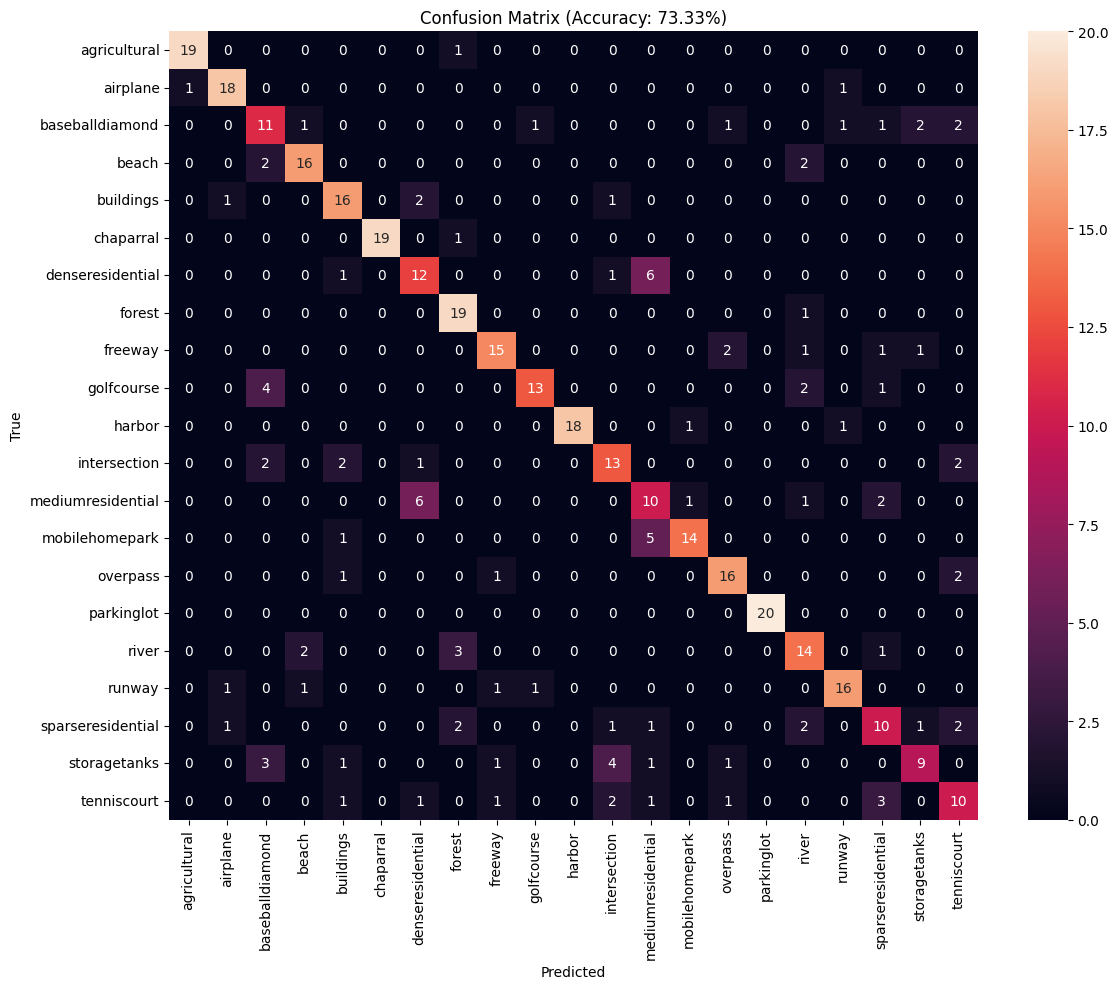

In [24]:
acc200 = accuracy_score(y_test, y_pred200)
acc150 = accuracy_score(y_test, y_pred150)
acc100 = accuracy_score(y_test, y_pred100)
acc50 = accuracy_score(y_test, y_pred50)
acc10 = accuracy_score(y_test, y_pred10)
print(f"\nTest Accuracy with k=200: {acc200*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred200))

cm = confusion_matrix(y_test, y_pred200, labels=class_names)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix (Accuracy: {acc200*100:.2f}%)")
plt.tight_layout()
plt.show()


Test Accuracy with k=150: 72.86%

Classification Report:
                   precision    recall  f1-score   support

     agricultural       0.94      0.85      0.89        20
         airplane       0.89      0.85      0.87        20
  baseballdiamond       0.47      0.45      0.46        20
            beach       0.85      0.85      0.85        20
        buildings       0.77      0.85      0.81        20
        chaparral       1.00      0.95      0.97        20
 denseresidential       0.63      0.60      0.62        20
           forest       0.68      0.95      0.79        20
          freeway       0.60      0.60      0.60        20
       golfcourse       0.82      0.70      0.76        20
           harbor       1.00      0.90      0.95        20
     intersection       0.70      0.80      0.74        20
mediumresidential       0.50      0.60      0.55        20
   mobilehomepark       0.61      0.70      0.65        20
         overpass       0.68      0.75      0.71        

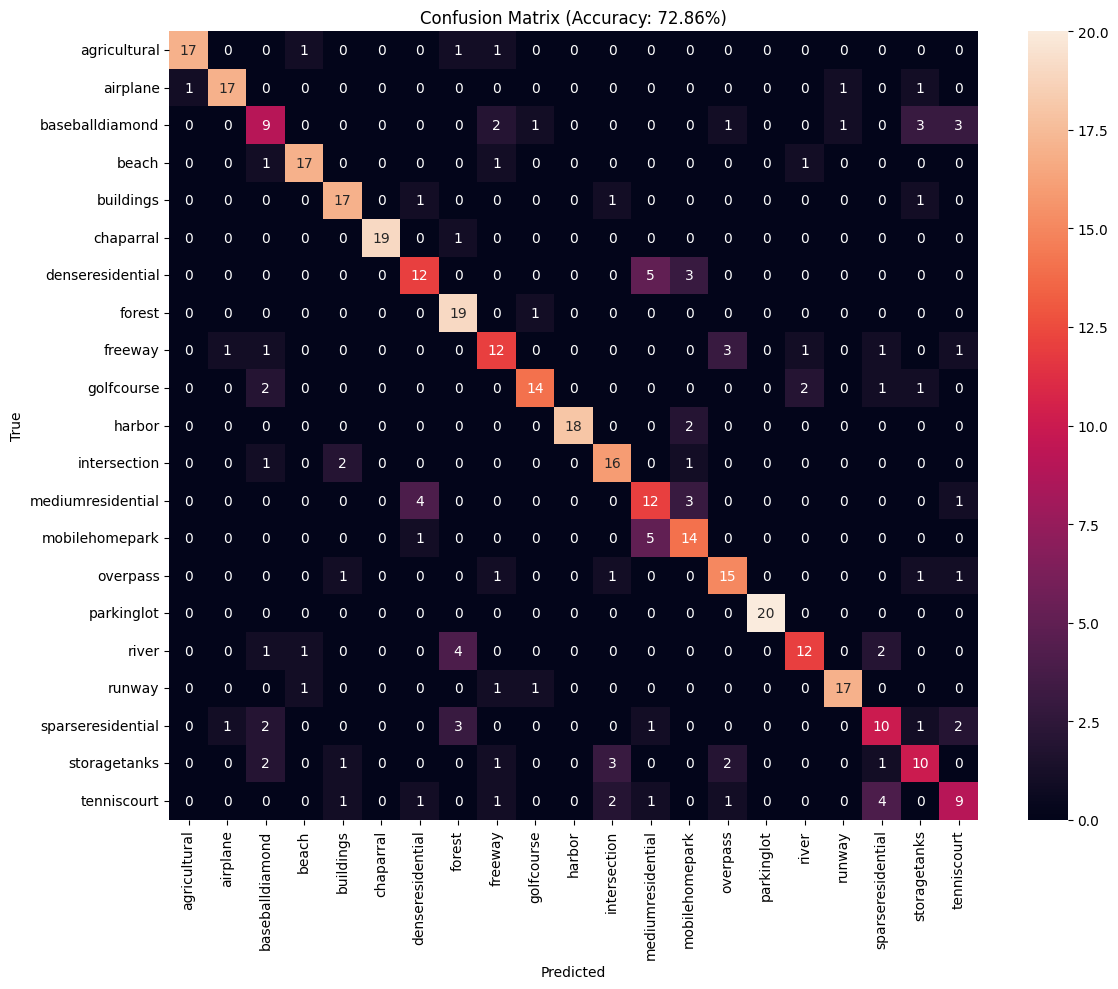

In [25]:
print(f"\nTest Accuracy with k=150: {acc150*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred150))

cm = confusion_matrix(y_test, y_pred150, labels=class_names)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix (Accuracy: {acc150*100:.2f}%)")
plt.tight_layout()
plt.show()


Test Accuracy with k=100: 69.29%

Classification Report:
                   precision    recall  f1-score   support

     agricultural       0.95      0.95      0.95        20
         airplane       0.86      0.60      0.71        20
  baseballdiamond       0.46      0.55      0.50        20
            beach       0.84      0.80      0.82        20
        buildings       0.54      0.75      0.62        20
        chaparral       1.00      0.95      0.97        20
 denseresidential       0.56      0.50      0.53        20
           forest       0.72      0.90      0.80        20
          freeway       0.64      0.70      0.67        20
       golfcourse       0.83      0.75      0.79        20
           harbor       1.00      0.90      0.95        20
     intersection       0.62      0.80      0.70        20
mediumresidential       0.33      0.35      0.34        20
   mobilehomepark       0.68      0.65      0.67        20
         overpass       0.64      0.70      0.67        

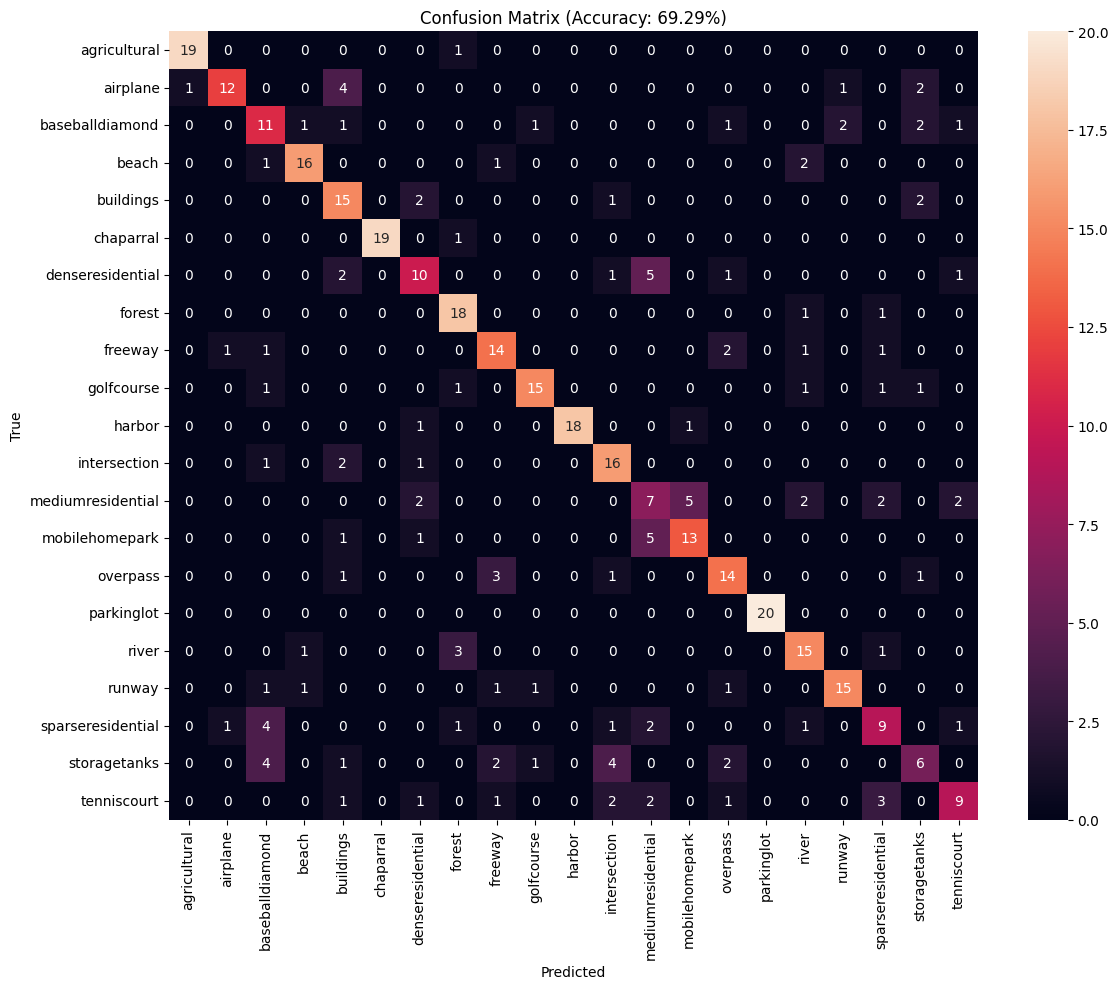

In [26]:
print(f"\nTest Accuracy with k=100: {acc100*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred100))

cm = confusion_matrix(y_test, y_pred100, labels=class_names)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix (Accuracy: {acc100*100:.2f}%)")
plt.tight_layout()
plt.show()


Test Accuracy with k=50: 67.86%

Classification Report:
                   precision    recall  f1-score   support

     agricultural       0.90      0.90      0.90        20
         airplane       0.74      0.70      0.72        20
  baseballdiamond       0.38      0.50      0.43        20
            beach       0.89      0.85      0.87        20
        buildings       0.59      0.80      0.68        20
        chaparral       1.00      0.95      0.97        20
 denseresidential       0.61      0.55      0.58        20
           forest       0.76      0.95      0.84        20
          freeway       0.68      0.65      0.67        20
       golfcourse       0.75      0.60      0.67        20
           harbor       1.00      0.80      0.89        20
     intersection       0.67      0.60      0.63        20
mediumresidential       0.42      0.50      0.45        20
   mobilehomepark       0.65      0.75      0.70        20
         overpass       0.62      0.75      0.68        2

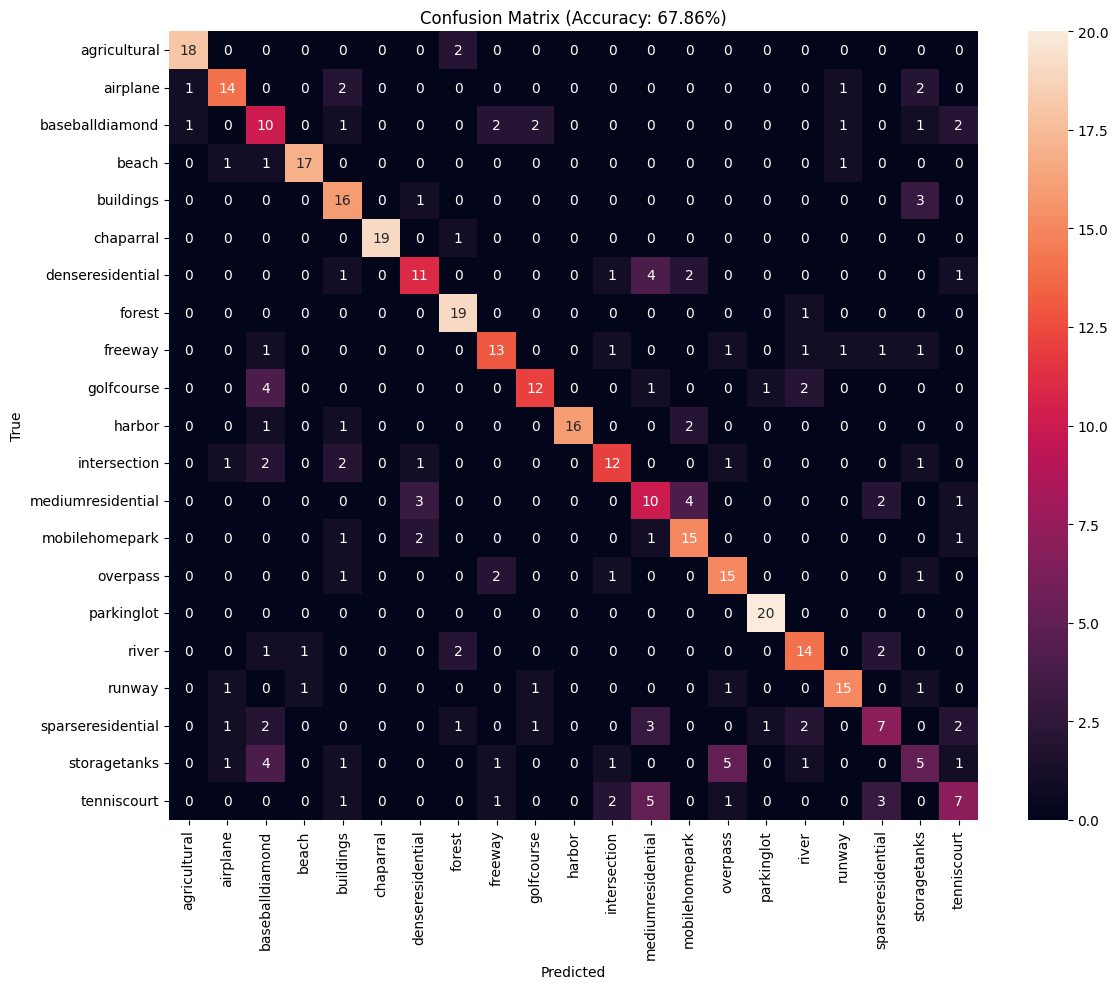

In [27]:
print(f"\nTest Accuracy with k=50: {acc50*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred50))

cm = confusion_matrix(y_test, y_pred50, labels=class_names)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix (Accuracy: {acc50*100:.2f}%)")
plt.tight_layout()
plt.show()


Test Accuracy with k=10: 51.67%

Classification Report:
                   precision    recall  f1-score   support

     agricultural       0.89      0.85      0.87        20
         airplane       0.53      0.40      0.46        20
  baseballdiamond       0.21      0.25      0.23        20
            beach       0.67      0.60      0.63        20
        buildings       0.44      0.60      0.51        20
        chaparral       0.95      0.95      0.95        20
 denseresidential       0.25      0.30      0.27        20
           forest       0.72      0.90      0.80        20
          freeway       0.39      0.35      0.37        20
       golfcourse       0.54      0.35      0.42        20
           harbor       0.73      0.80      0.76        20
     intersection       0.44      0.60      0.51        20
mediumresidential       0.28      0.25      0.26        20
   mobilehomepark       0.58      0.70      0.64        20
         overpass       0.41      0.55      0.47        2

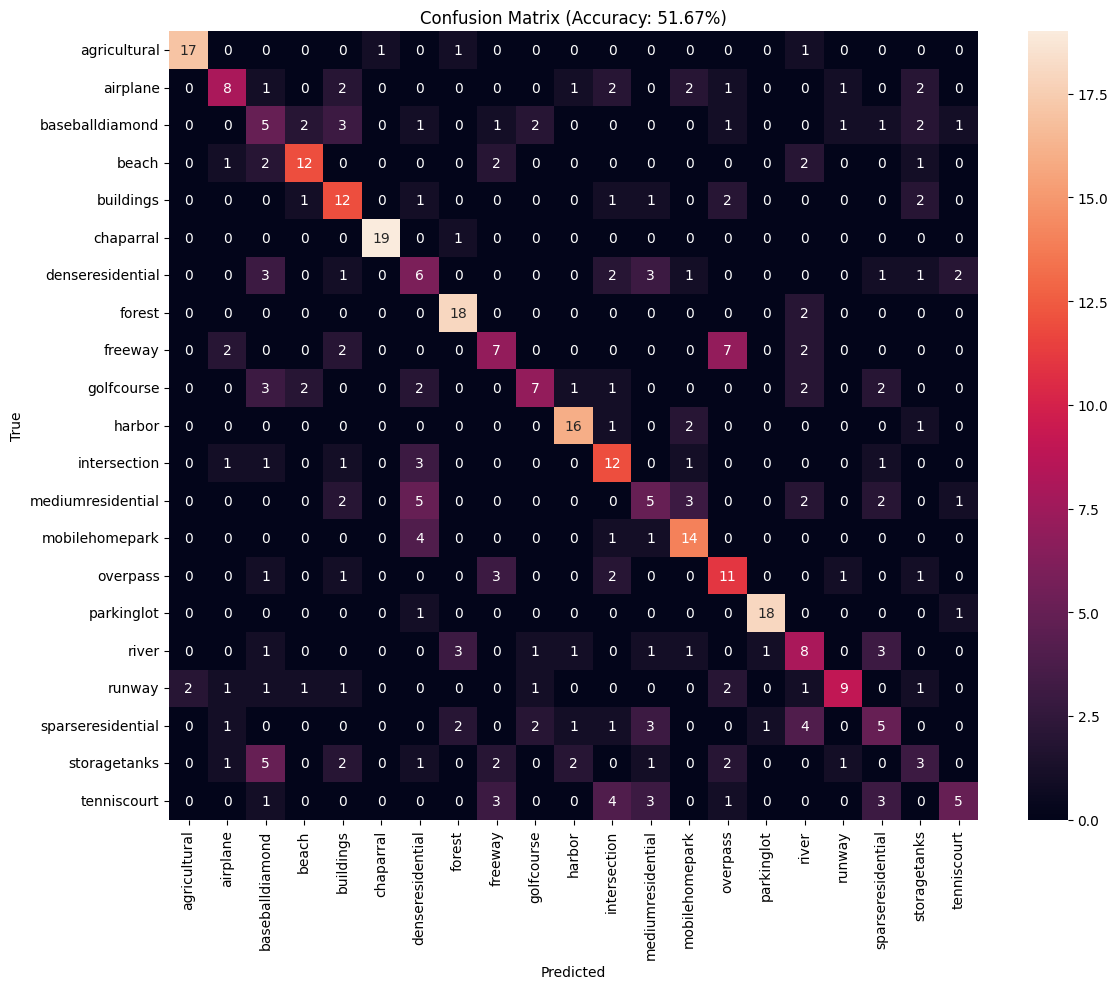

In [28]:
print(f"\nTest Accuracy with k=10: {acc10*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred10))

cm = confusion_matrix(y_test, y_pred10, labels=class_names)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix (Accuracy: {acc10*100:.2f}%)")
plt.tight_layout()
plt.show()

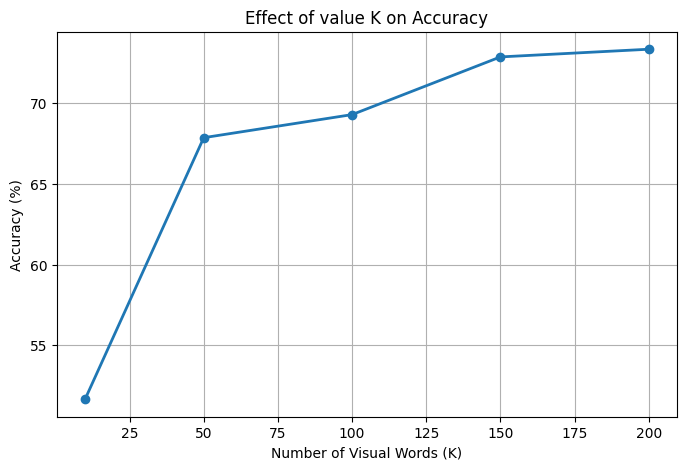

In [30]:
K_values = [10, 50, 100, 150, 200]
accuracies = [acc10, acc50, acc100, acc150, acc200]
plt.figure(figsize=(8,5))
plt.plot(K_values, [a*100 for a in accuracies], marker='o', linewidth=2)
plt.title("Effect of value K on Accuracy")
plt.xlabel("Number of Visual Words (K)")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()